# Transformée de Fourier à Temps Discret (TFTD)

In [10]:
# Import all the usual stuff
import numpy as np
pi = np.pi 
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
# define time vector
Tech = 1 # période d'échantillonnage
n = np.arange(0,100,Tech)

Soit $x[n] = \alpha ^ n u[n]$ pour $n \in \{0,...,100\}$ et $T_e = 1$ 

In [12]:
# define signal
u = np.ones(n.size)
u = u*np.array((n>=1),dtype=int) #fonction porte
alpha = 0.9
x = alpha**(n) * u 

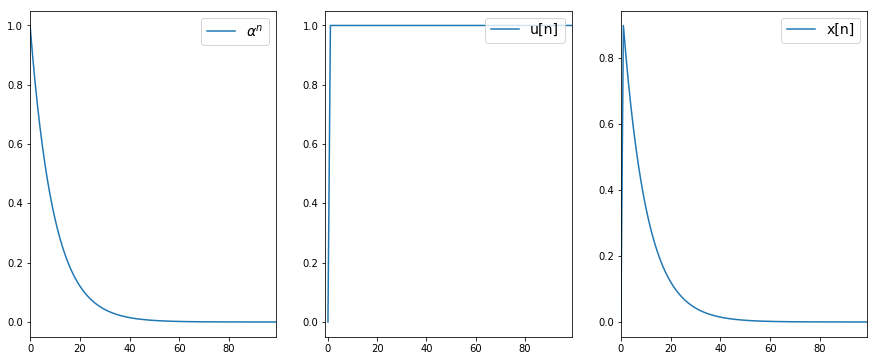

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(n,alpha**n,label=r'$\alpha ^ n$')
plt.xlim(n.min(),n.max())
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(n,u,label=r'u[n]')
plt.xlim(n.min()-1,n.max())
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(n,x,label=r'x[n]')
plt.xlim(n.min(),n.max())
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [14]:
F0 = 0.001
f = np.arange(-1/(2*Tech),1/(2*Tech),F0)
#f = np.arange(-1,1,F0)
#f = np.arange(-2,2,F0)

La TFTD de $x$ : $\hat{x}(f) = \frac{1}{1-\alpha e^{-2 i \pi f}}$

In [15]:
x_hat = 1/(1-alpha*np.exp(-1j*2*pi*f)) #TFTD de x

(-0.5, 0.4990000000000009)

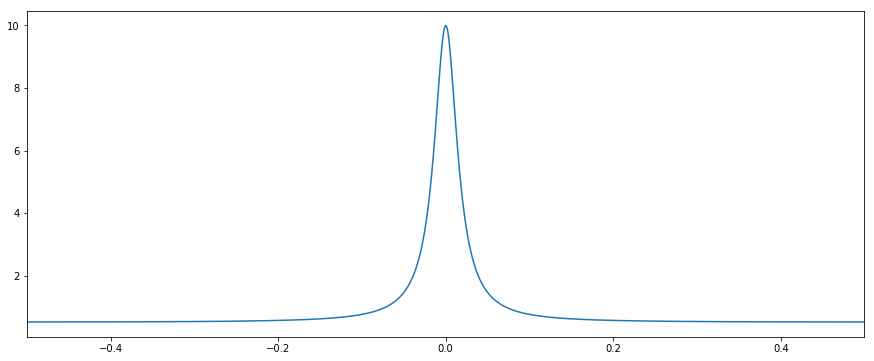

In [16]:
plt.figure(figsize=(15,6))
plt.plot(f,x_hat,label=r'$\hat{x}(f)$')
plt.xlim(f.min(),f.max())

# TFTD vs TFD

Soit $x[n] = e^{2i\pi f_0 n} u[n]$ avec $n \in \{0,...,N-1\}$ et $f_0 \in [0,1]$

In [17]:
N = 32 #Nombre d'échantillons
n = np.arange(0,N-1,1)
f0 = 0.2 #Fréquence nominale de x
#f0 = 3/N

In [18]:
x = np.exp(1j*2*pi*f0*n)

In [19]:
f = np.linspace(0,1,1000)
k = n

La Transformée de Fourier à Temps Discret de $x$ : 
$\hat{x}_{TFTD}(f) = \frac{\sin(\pi N (f-f_0))}{sin(\pi (f-f_0))} e^{-i \pi (f-f_0)(N-1)}$

La Transformée de Fourier Discrète de $x$ : 
$\hat{x}_{TFD}[k] = \frac{\sin(\pi N (f_0-k/N))}{sin(\pi (f_0-k/N))} e^{i \pi (f0-k/N)(N-1)}$

In [20]:
x_TFTD = (np.sin(pi*N*(f-f0))/np.sin(pi*(f-f0)))*np.exp(-1j*pi*(f-f0)*(N-1)) #TFTD de x
x_TFD = (np.sin(pi*N*(f0-k/N))/np.sin(pi*(f0-k/N)))*np.exp(1j*pi*(f0-k/N)*(N-1)) #TFD de x

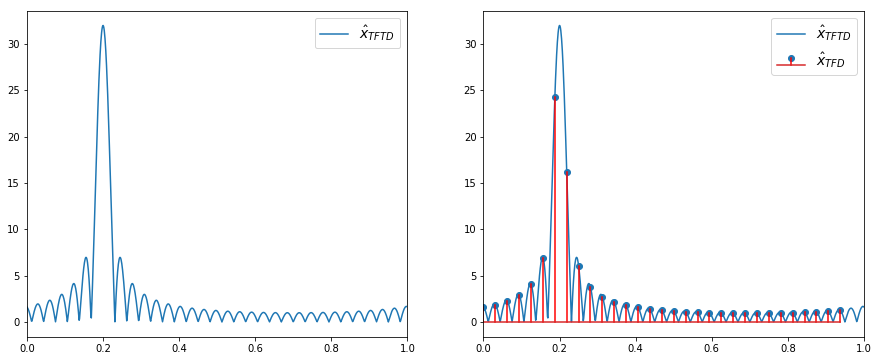

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(f,abs(x_TFTD),label=r'$\hat{x}_{TFTD}$')
plt.xlim(f.min(),f.max())
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(f,abs(x_TFTD),label=r'$\hat{x}_{TFTD}$')
plt.stem(k/N,abs(x_TFD),'r',label=r'$\hat{x}_{TFD}$')
plt.xlim(f.min(),f.max())
plt.legend(loc='upper right',fontsize=14)

# Transformée de Fourier Discrète

Soit $x[n] = \alpha ^ n $ pour $n \in \{0,...,M-1\}$ et $T_e = 1$ , $M = 32$ 

In [22]:
M = 32 #Nombre d'échantillons
n = np.arange(0,M,1)
alpha = 0.5
x = alpha**(n)

(0, 31)

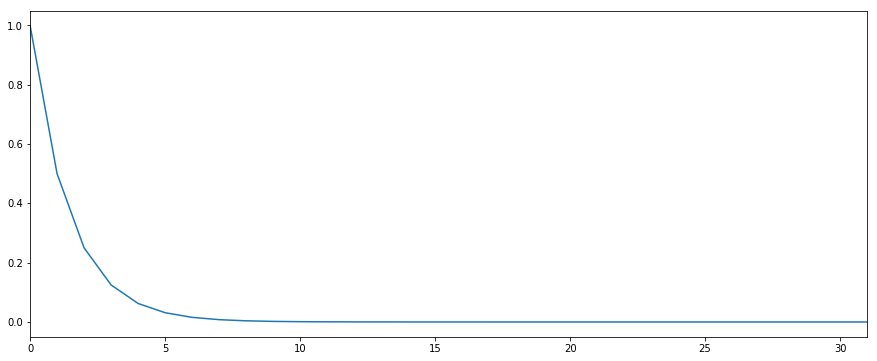

In [23]:
plt.figure(figsize=(15,6))
plt.plot(n,x)
plt.xlim(n.min(),n.max())

La transformée de Fourier discète revient à faire une décomposition dans la base orthogonale $\{w_k [n] = e^{2i \pi n k / P}\}_k$

Soit $\hat{x}$ la trasnformée de Fourier discrète de $x$ :

$\hat{x}[k] = < w_k , x > $

In [24]:
def TFD(x,P) : 
    x_hat = np.zeros(P,dtype=complex)
    n = np.arange(0,len(x),1)
    for k in range(0,P) :
        wk = np.exp(1j*2*np.pi*n*k/P) # fonction de décomposition
        x_hat[k] = x @ wk.T.conjugate() #calcul des coefficients
    return x_hat

x_hat = TFD(x,x.size)

In [25]:
def iTFD(x_hat,N): 
    x_rec = np.zeros(N,dtype=complex)
    P = len(x_hat)
    n = np.arange(0,N)
    for k in range(P) :
        wk = np.exp(1j*2*np.pi*n*k/P) # reconstruction function
        x_rec += x_hat[k] * wk #compute reconstruction
    return np.real(x_rec)/P

x_rec = iTFD(x_hat,x.size)

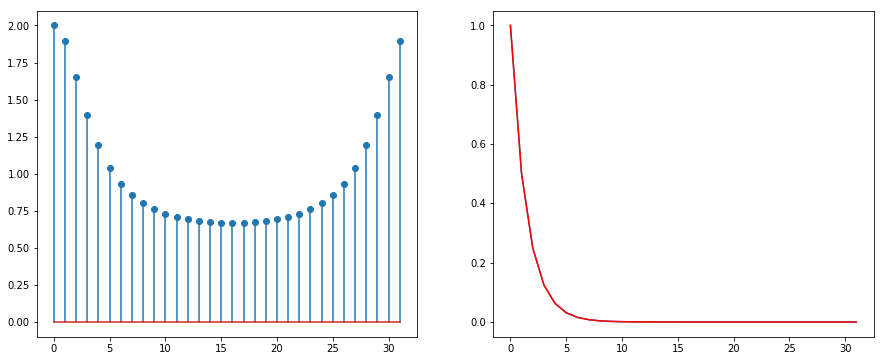

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.stem(np.real(x_hat))
plt.subplot(122)
plt.plot(n,x_rec)
plt.plot(n,x,'r')

In [27]:
def periodize(x,nb_periode):
    xp = x
    for p in range(nb_periode-1):
        xp = np.hstack((xp,x))
    return xp

In [28]:
xp = periodize(x,2)
xp_hat = TFD(xp,xp.size)

<StemContainer object of 3 artists>

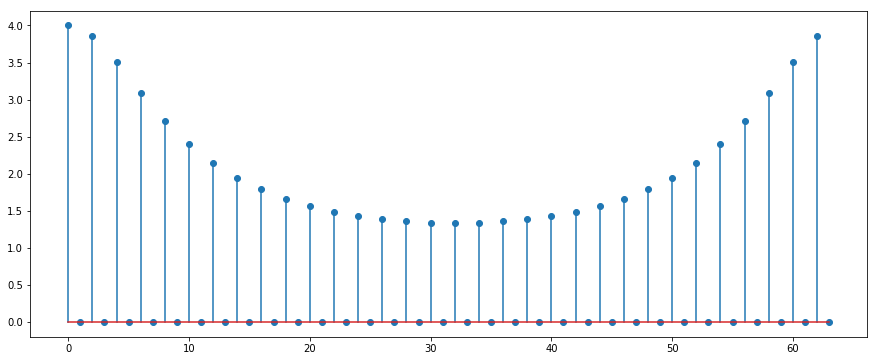

In [29]:
plt.figure(figsize=(15,6))
plt.stem(np.abs(xp_hat))

In [30]:
def TFD_shift(X):
    N = len(X)
    if (N % 2 == 0):
        return np.arange(-int(N/2), int(N/2) + 1), np.concatenate((X[int(N/2):], X[:int(N/2)+1]))
    else:
        return np.arange(-int((N-1)/2), int((N-1)/2) + 1), np.concatenate((X[int((N+1)/2):], X[:int((N+1)/2)]))

<StemContainer object of 3 artists>

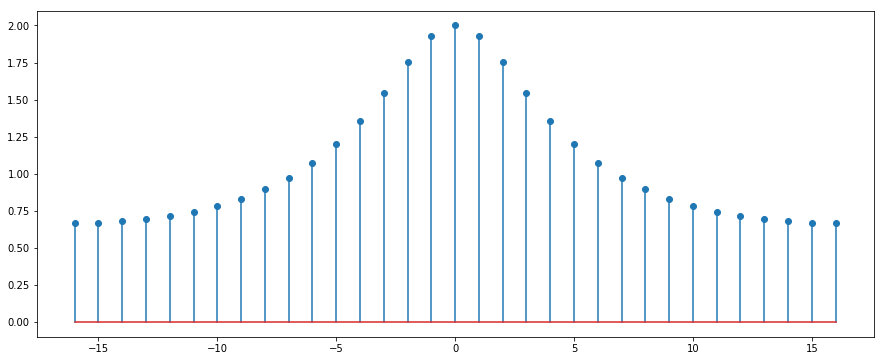

In [31]:
n, x_hat_shift = TFD_shift(x_hat)

plt.figure(figsize=(15,6))
plt.stem(n, abs(x_hat_shift))

# Transformée de Fourier Discrete par produit matriciel

In [32]:
def TFD_matrix(x,P):
    #P : nombre de fréquences
    #N : nombre d'échantillons 
    # Crée un vecteur 1xN avec les indices de 0 à N-1
    n = np.expand_dims(np.arange(x.size), 0)
    p = np.expand_dims(np.arange(P), 0)
    
    W = np.exp(-2j * (np.pi / P) * (n.T @ p))
    
    x_hat = W.T.conjugate() @ x
    return x_hat

In [33]:
def iTFD_matrix(x_hat,N):
    #P : nombre de fréquences
    #N : nombre d'échantillons 
    # Crée un vecteur 1xN avec les indices de 0 à N-1
    P = x_hat.size
    n = np.expand_dims(np.arange(N), 0)
    p = np.expand_dims(np.arange(P), 0)
    
    W = np.exp(-2j * (np.pi / P) * (n.T @ p))
    
    x_rec = W @ x_hat
    return np.real(x_rec/P)

In [34]:
x_hat = TFD_matrix(x,len(x))
x_rec = iTFD_matrix(x_hat,len(x))
print('Erreur de reconstruction : ',sum((x_rec-x)**2))

Erreur de reconstruction :  1.049361625261541e-29


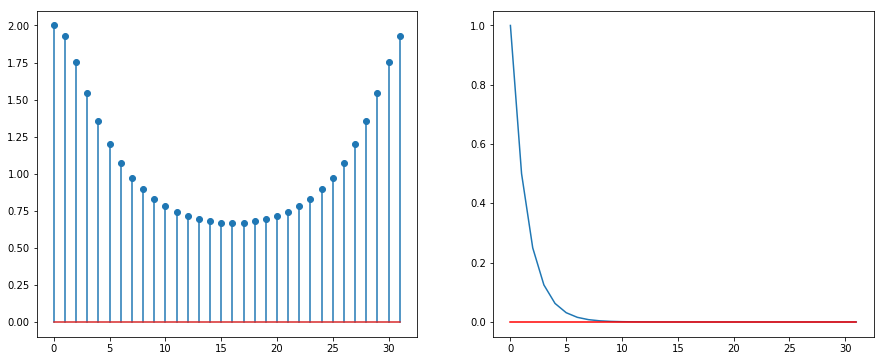

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.stem(np.abs(x_hat))
plt.subplot(122)
plt.plot(x_rec)
plt.plot(x_rec-x,'r')

# Exercice pratique

In [36]:
import IPython
from scipy.io import wavfile
Fe, x = wavfile.read("piano.wav")

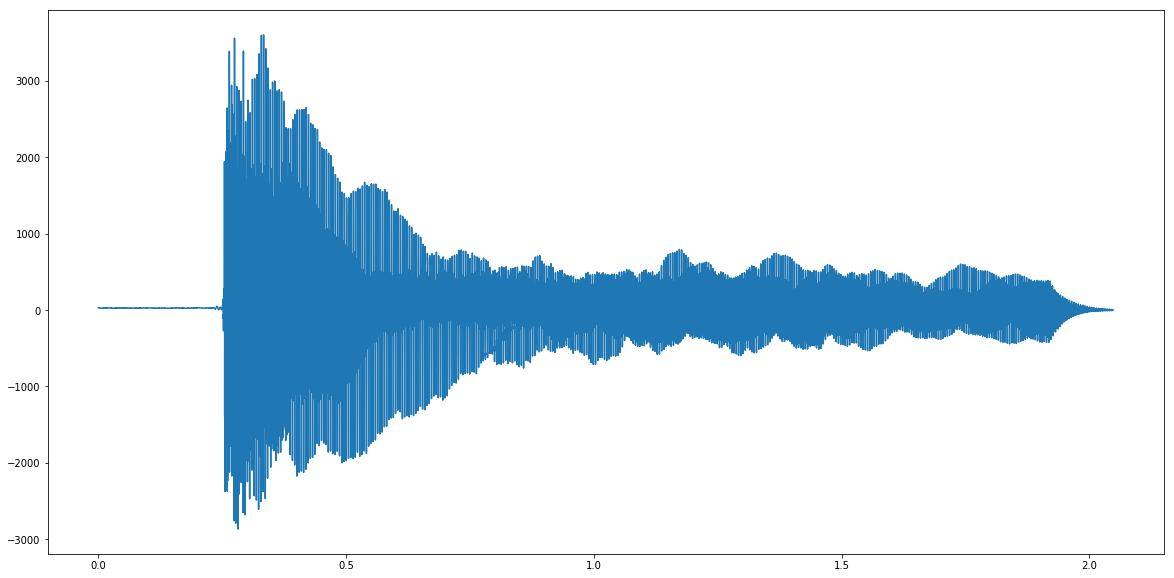

In [37]:
t = np.arange(0,x.size/Fe,1/Fe)
plt.figure(figsize=(20,10))
plt.plot(t,x)

In [38]:
def TFD_map(x_hat, Fe, shift=True):
    resolution = float(Fe) / len(x_hat)
    if shift:
        n, x_hat_shift = TFD_shift(x_hat)
    else:
        x_hat_shift = x_hat
        n = np.arange(0, len(x_hat))
    f = n * resolution
    return f, x_hat_shift

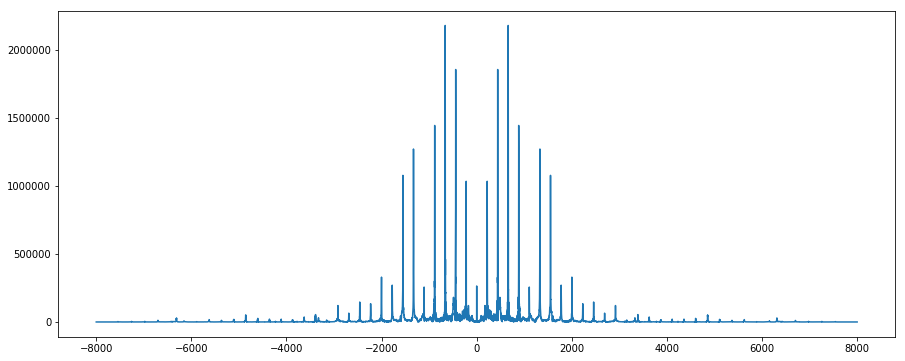

In [39]:
x = x[:10000]
x_hat = TFD(x,x.size)
f, x_hat_shift = TFD_map(x_hat, Fe)
plt.figure(figsize=(15,6))
plt.plot(f, abs(x_hat_shift))

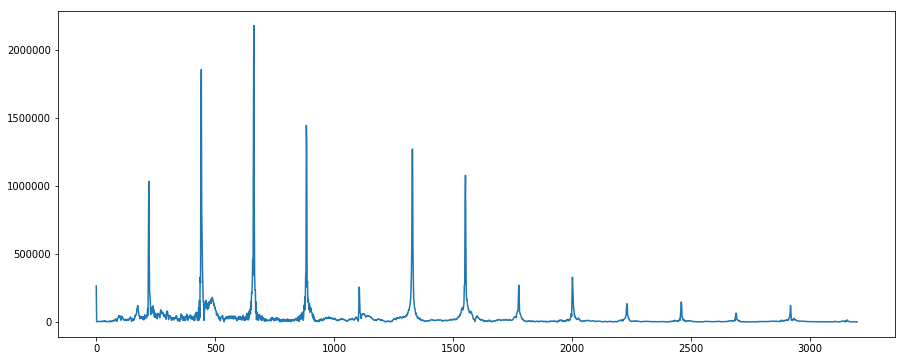

In [78]:
f, x_hat_shift = TFD_map(x_hat, Fe,shift = False)
plt.figure(figsize=(15,6))
plt.plot(f[:2000], abs(x_hat_shift[:2000]));

In [79]:
tfd_resolution = float(Fe)/ len(x)
print("La resolution de la FTD est ", tfd_resolution, "Hz")

# Recherche jusqu'à 300 Hz
max_range = int(300 / tfd_resolution)
ix = np.argmax(abs(x_hat_shift[:max_range]))
pitch = f[ix]
print("La note a un ton de ", pitch, "Hz")

La resolution de la FTD est  1.6 Hz
La note a un ton de  220.8 Hz


# Precision / Resolution

Exemple de problème de résolution quand N trop petit pour permettre la séparation de deux fréquences

Premère pulsation :  0.6283185307179586
Seconde pulsation :  0.7019496085364694


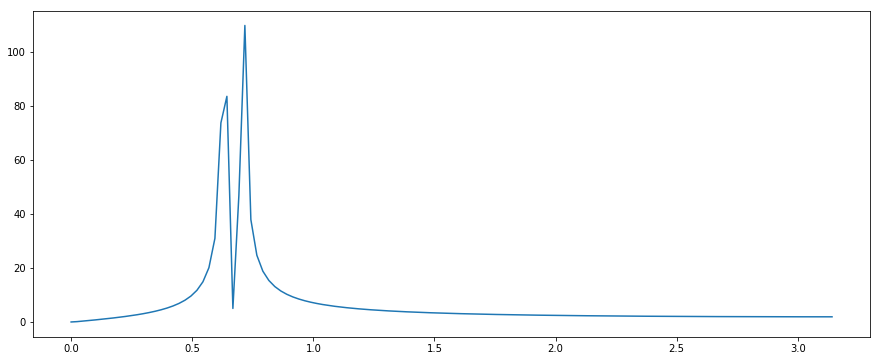

In [43]:
N = 256
Delta = 2*np.pi / N #résolution
n = np.arange(0, N)
f0 = 1/10
x = np.cos(2*pi*f0 * n) + np.cos((2*pi*f0 + 3*Delta) * n)
print('Premère pulsation : ', 2*pi*f0)
print('Seconde pulsation : ', 2*pi*f0 + 3*Delta)
plt.figure(figsize=(15,6))
plt.plot(np.linspace(0,pi,N/2),abs(TFD(x,x.size))[:int(N/2)]);

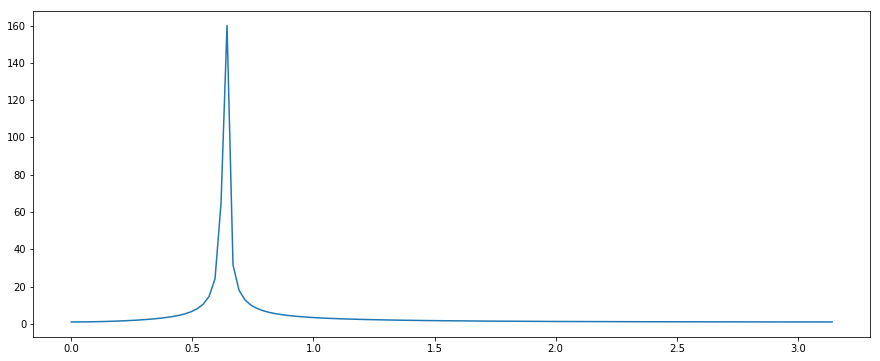

In [42]:
x = np.cos(2*pi*f0 * n) + np.cos((2*pi*f0 + 0.5*Delta) * n)
plt.figure(figsize=(15,6))
plt.plot(np.linspace(0,pi,N/2),abs(TFD(x,x.size))[:int(N/2)]);

# Fenêtre de pondération

In [34]:
N = 256
n = np.arange(0, N)
f = 10
x = np.sin(2*pi*n*f/N)
x_hat = TFD(x,x.size)[:int(N/2)]
#h_porte= np.zeros(n.size)
#h_porte[int(0.15*n.size):int(0.75*n.size)] = 1
x_tronc = x[:-20]
Nt = x_tronc.size
nt = np.arange(0, Nt)
x_tronc_hat = TFD(x_tronc,x_tronc.size)[:int(N/2)]

<StemContainer object of 3 artists>

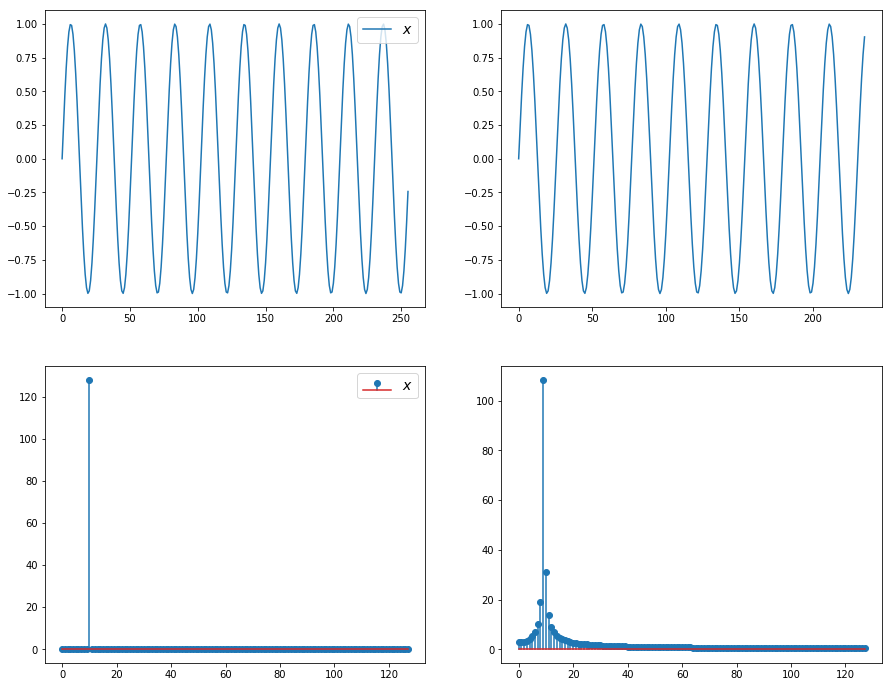

In [35]:
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.plot(x,label=r'$x$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(222)
plt.plot(x_tronc,label=r'$x \times h$')
plt.subplot(223)
plt.stem(abs(x_hat),label=r'$x$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(224)
plt.stem(abs(x_tronc_hat),label=r'$x \times h$')

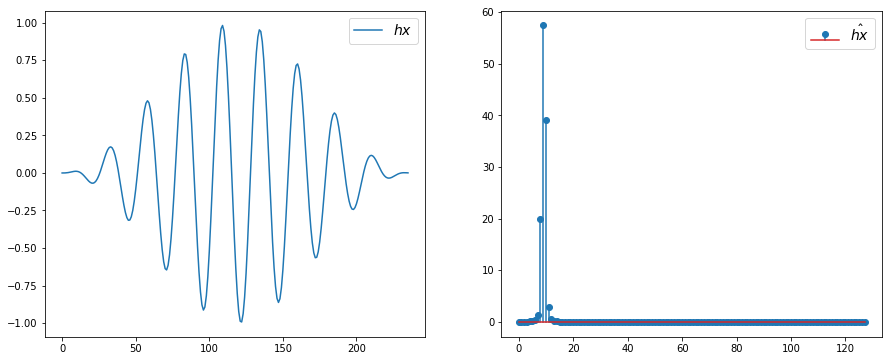

In [36]:
h_hanning = 0.5*(1-np.cos(2*pi*nt/(Nt+1)))
hx = x_tronc*h_hanning
hx_hat = TFD(hx,hx.size)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(hx,label=r'$hx$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.stem(abs(hx_hat)[:int(N/2)],label=r'$\hat{hx}$')
plt.legend(loc='upper right',fontsize=14)

# Tracer des différentes fenêtres d'apodisation

In [37]:
N = 32
n = np.arange(N)
h_porte= np.zeros(n.size)
h_porte[int(0.1*n.size):int(0.9*n.size)] = 1
f,h_porte_hat = TFD_shift(TFD(h_porte,2048))
h_porte_hat = h_porte_hat/abs(h_porte_hat).max()

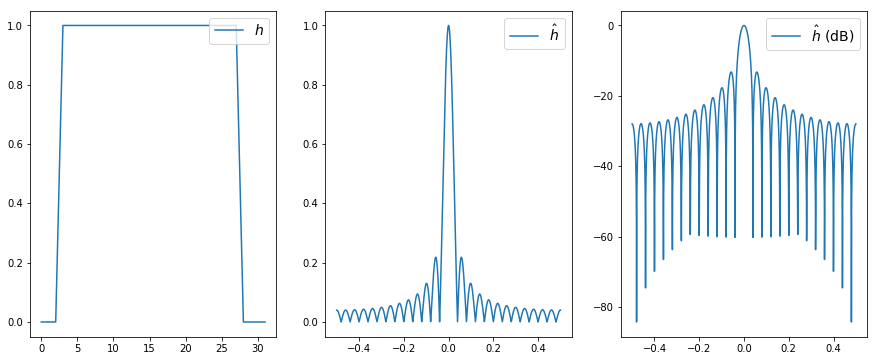

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(h_porte,label=r'$h$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(f/2048,abs(h_porte_hat),label=r'$\hat{h}$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(f/2048,20*np.log10(abs(h_porte_hat)),label=r'$\hat{h}$ (dB)')
plt.legend(loc='upper right',fontsize=14)

In [39]:
h_hanning = 0.5*(1-np.cos(2*pi*n/(N+1)))
f,h_hann_hat = TFD_shift(TFD(h_hanning,2048))
h_hann_hat = h_hann_hat/abs(h_hann_hat).max()

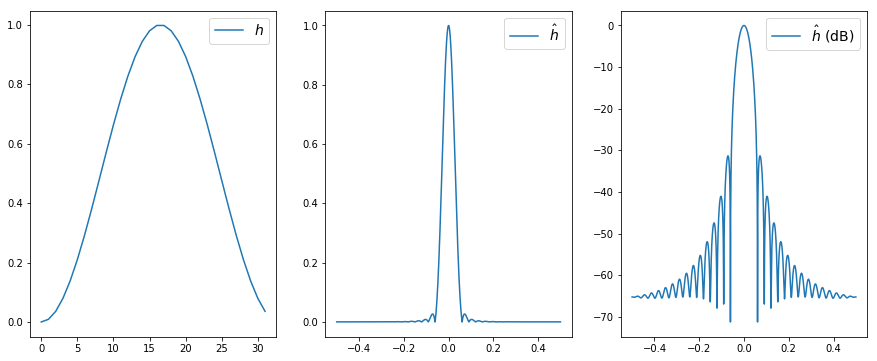

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(h_hanning,label=r'$h$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(f/2048,abs(h_hann_hat),label=r'$\hat{h}$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(f/2048,20*np.log10(abs(h_hann_hat)),label=r'$\hat{h}$ (dB)')
plt.legend(loc='upper right',fontsize=14)

In [41]:
h_blackman = 0.42-0.5*np.cos(2*pi*n/(N-1))+0.08*np.cos(4*pi*n/(N-1))
f,h_black_hat = TFD_shift(TFD(h_blackman,2048))
h_black_hat = h_black_hat/abs(h_black_hat).max()

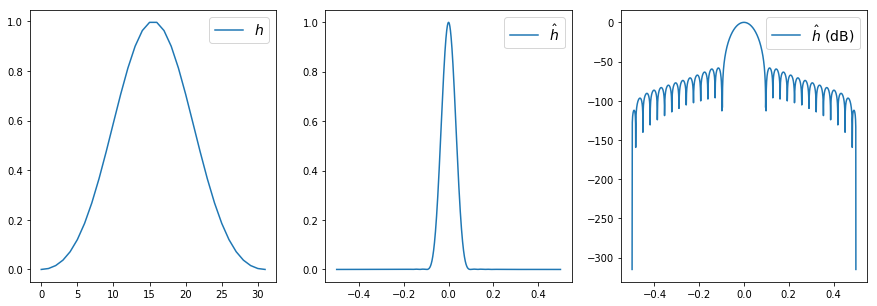

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(h_blackman,label=r'$h$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(f/2048,abs(h_black_hat),label=r'$\hat{h}$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(f/2048,20*np.log10(abs(h_black_hat)),label=r'$\hat{h}$ (dB)')
plt.legend(loc='upper right',fontsize=14)

# Implémentation de la FFT

In [44]:
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2]) #calcul récursif 
    odd =  fft(x[1::2])
    T= [np.exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return np.array([even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)])

In [50]:
M = 8192 #Nombre d'échantillons
n = np.arange(0,M,1)
alpha = 0.5
x = alpha**(n)

In [53]:
import time
deb = time.time()
x_hatFFTnp = np.fft.fft(x)
x_hatFFTnp[0]
stopfftnp = time.time()
x_hatFFT = fft(x)
stopfft = time.time()
x_hatTFD = TFD_matrix(x,len(x))
stoptfd = time.time()
print('Temps de calcul de la FFT avec numpy : ', (stopfftnp-deb), ' s')
print('Temps de calcul de la FFT : ', (stopfft-stopfftnp), ' s')
print('Temps de calcul de la TFD : ', (stoptfd-stopfft), ' s')

Temps de calcul de la FFT avec numpy :  0.0  s
Temps de calcul de la FFT :  0.1948561668395996  s
Temps de calcul de la TFD :  5.810379981994629  s


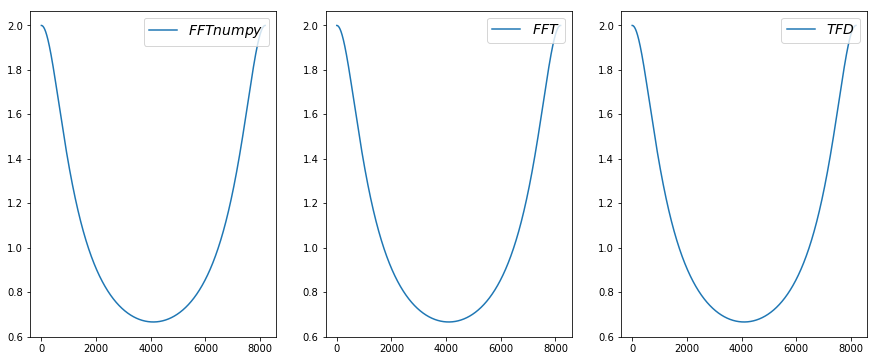

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(abs(x_hatFFTnp),label=r'$FFT numpy$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(abs(x_hatFFT),label=r'$FFT$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(abs(x_hatTFD),label=r'$TFD$')
plt.legend(loc='upper right',fontsize=14)

### Erreurs numériques

soit x[n] : 

$$
    x[n] = \begin{cases}
            1 & \mbox{$0 \leq n < 64$} \\
            0 & \mbox{$64 \leq n < 128$}
        \end{cases}
$$

Sa transformée de Fourier, $\hat{x}[k] :$ 

$$
    \hat{x}[k] = \begin{cases}
            64 & \mbox{$k=0$} \\
            0 & \mbox{$k \neq 0$, $k$ pair} \\
            \frac{(-1)^{(k-1)/2}\,e^{-j\pi\frac{63}{128}k}}{\sin(\frac{\pi}{128}k)} & \mbox{$k$ impair}
        \end{cases}
$$

Sa phase est alors :

$$
    \angle \hat{x} = \begin{cases}
            0 & \mbox{pour $k$ pair} \\
            -\pi + \frac{\pi}{128}k & \mbox{pour $k$ impair}
        \end{cases}
$$

Cependant, nous allons voir que numériquement nous obtenons un résultat différent:

<StemContainer object of 3 artists>

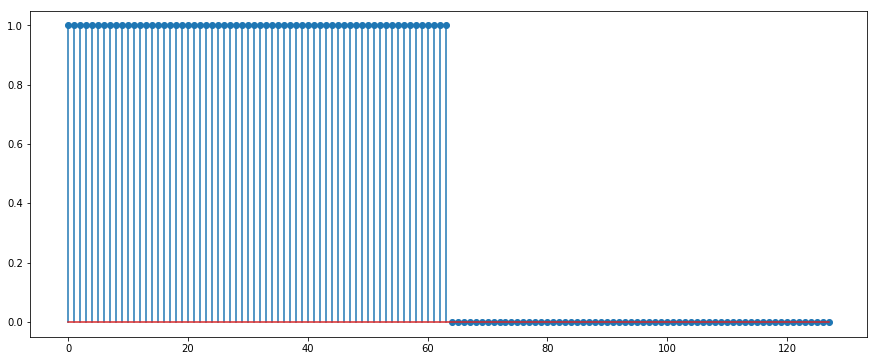

In [185]:
N = 128
x = np.zeros(N)
x[0:64] = 1

plt.figure(figsize=(15,6))
plt.stem(x)

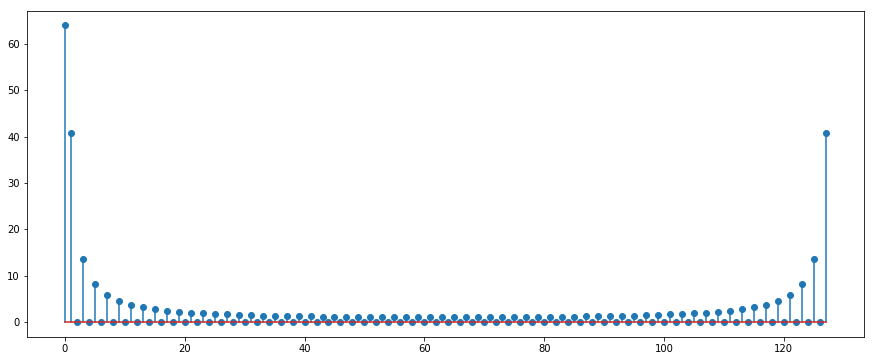

<StemContainer object of 3 artists>

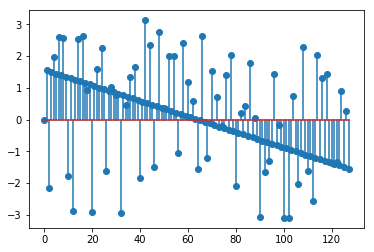

In [186]:
x_hat = TFD_matrix(x,N);
plt.figure(figsize=(15,6))
plt.stem(abs(x_hat))
plt.show()
plt.stem(np.angle(x_hat))

Il y a un problème avec la phase même si l'amplitude semble correcte. Cela est dû au fait que la phase est calculée par l'artangente d'une fraction. Par conséquent, les erreurs numériques lors des valeurs de TFD proches de zéro mènent à des erreurs importantes dans la phase.

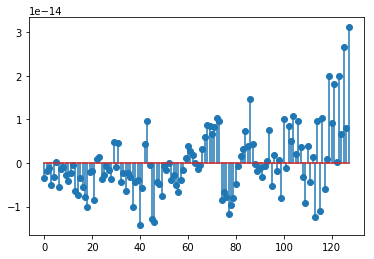

<StemContainer object of 3 artists>

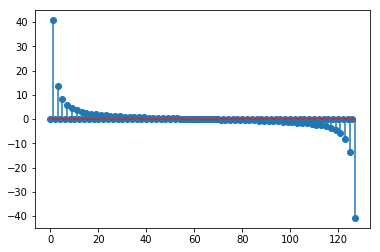

In [187]:
x_rec = iTFD_matrix(x_hat,N)

plt.stem(np.real(x_rec - x));
plt.show();
plt.stem(np.imag(x_hat))

L'erreur est faible mais pas à zéro

L'algorithme de la FFT n'est pas seulement plus rapide que la TFD, il est également mieux conditionné numériquement. Dans la FFT, un grand soin est pris pour minimiser le nombre de facteurs trigonométriques.

Dans l'exemple ci-dessous, la phase est maintenant plus précise avec un erreur de reconstruction bien plus faible.

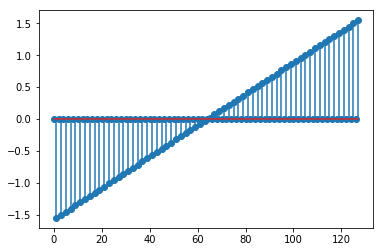

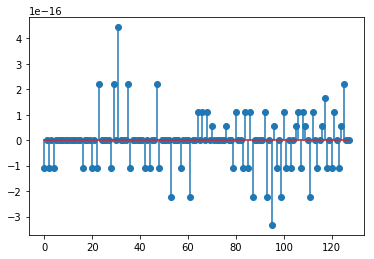

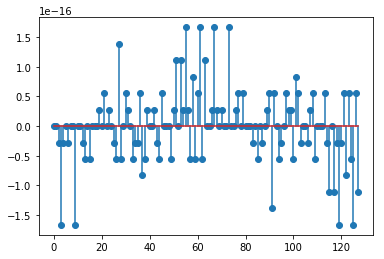

In [188]:
X = np.fft.fft(x)
x_hat = np.fft.ifft(X)

plt.stem(np.angle(X));
plt.show();

plt.stem(np.real(x_hat - x));
plt.show();

plt.stem(np.imag(x_hat));